In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [196]:
def resultado_final(fila):
    if fila[1]["equipo_1_final"] > fila[1]["equipo_2_final"]:
        return "Ganado","Perdido"
    elif fila[1]["equipo_1_final"] < fila[1]["equipo_2_final"]:
        return "Perdido","Ganado"
    else:
        return "Empate","Empate"

In [197]:
url = "https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt"
data = pd.read_csv(url, sep="\t")

In [198]:
data[["equipo_1_resultado","equipo_2_resultado"]] = list(map(lambda x: resultado_final(x), data.iterrows()))

In [199]:
data

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,equipo_1_resultado,equipo_2_resultado
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1,Ganado,Perdido
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0,Ganado,Perdido
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1,Ganado,Perdido
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1,Ganado,Perdido
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0,Ganado,Perdido
...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Rusia,Samara Arena,Samara (UTC+4),(60),2018-07-07,Suecia,Inglaterra,0,2,Perdido,Ganado
896,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(61),2018-07-10,Francia,Bélgica,1,0,Ganado,Perdido
897,2018,Rusia,Luzhniki Stadium,Moscow (UTC+3),(62),2018-07-11,Croacia,Inglaterra,2,1,Ganado,Perdido
898,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(63),2018-07-14,Bélgica,Inglaterra,2,0,Ganado,Perdido


In [200]:
paises = pd.concat([data["equipo_1"],data["equipo_2"]])

In [201]:
partidos_jugados = paises.value_counts().rename_axis('pais').reset_index(name='partidos_jugados')

In [202]:
goles_a_favor = (data.groupby('equipo_1')['equipo_1_final'].sum() + data.groupby('equipo_2')['equipo_2_final'].sum()).rename_axis('pais').reset_index(name="goles_a_favor")
goles_en_contra = (data.groupby('equipo_1')['equipo_2_final'].sum() + data.groupby('equipo_2')['equipo_1_final'].sum()).rename_axis('pais').reset_index(name="goles_en_contra")

In [203]:
partidos_local = (data.groupby("equipo_1")["equipo_1_resultado"].value_counts()).rename_axis(['pais',"resultado"]).reset_index(name="partidos_local")
partidos_local_pivot = partidos_local.pivot(index='pais', columns='resultado', values='partidos_local').reset_index().fillna(0)
partidos_local_pivot.columns.name = None

In [204]:
partidos_visitante = data.groupby("equipo_2")["equipo_2_resultado"].value_counts().rename_axis(['pais',"resultado"]).reset_index(name="partidos_visitante")
partidos_visitante_pivot = partidos_visitante.pivot(index='pais', columns='resultado', values='partidos_visitante').reset_index().fillna(0)
partidos_visitante_pivot.columns.name = None

In [205]:
partidos_local_pivot[["Empate","Ganado","Perdido"]] = partidos_local_pivot[["Empate","Ganado","Perdido"]].astype(int)
partidos_visitante_pivot[["Empate","Ganado","Perdido"]] = partidos_visitante_pivot[["Empate","Ganado","Perdido"]].astype(int)

In [206]:
resultados = pd.concat([partidos_local_pivot, partidos_visitante_pivot]).groupby("pais").sum()

In [207]:
estadisticas_por_pais = partidos_jugados.merge(goles_a_favor, on="pais", how="left").merge(goles_en_contra, on="pais", how="left").merge(resultados, on="pais", how="left")

In [208]:
estadisticas_por_pais.fillna(0.0, inplace=True)
estadisticas_por_pais["goles_a_favor"] = estadisticas_por_pais["goles_a_favor"].astype(int)
estadisticas_por_pais["goles_en_contra"] = estadisticas_por_pais["goles_en_contra"].astype(int)

In [209]:
estadisticas_por_pais["rendimiento"] = estadisticas_por_pais.apply(lambda x: round((x.Ganado/x.partidos_jugados)*100,2), axis=1)

In [210]:
estadisticas_por_pais

,pais,partidos_jugados,goles_a_favor,goles_en_contra,Empate,Ganado,Perdido,rendimiento
0,Brasil,109,238,109,11,79,19,72.48
1,Italia,83,133,87,18,45,20,54.22
2,Argentina,81,149,101,11,47,23,58.02
3,Inglaterra,69,96,71,16,31,22,44.93
4,Francia,66,129,85,9,37,20,56.06
...,...,...,...,...,...,...,...,...
80,Zaire,3,0,14,0,0,3,0.00
81,Israel,3,1,3,2,0,1,0.00
82,Cuba,3,3,10,1,1,1,33.33
83,Indias Orientales Holandesas,1,0,0,0,0,1,0.00


In [211]:
top_paises =estadisticas_por_pais.head(5)

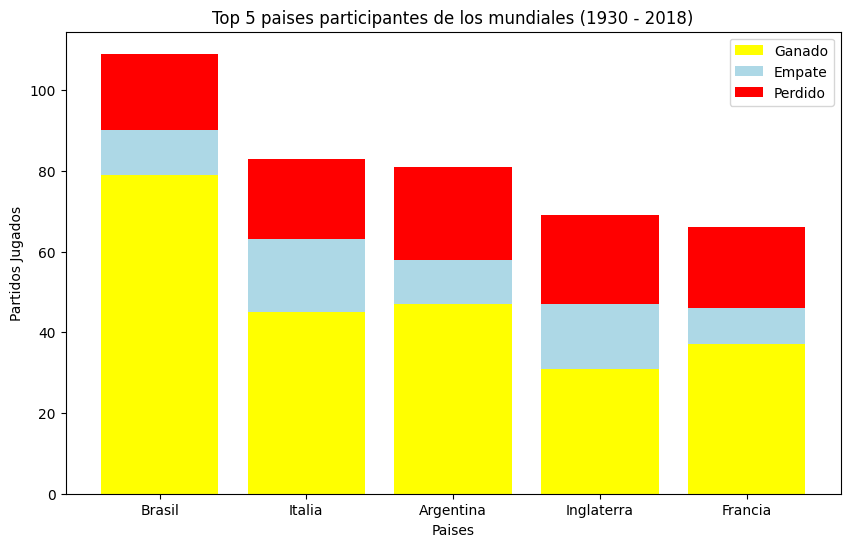

In [250]:
plt.figure(figsize=(10,6))
plt.bar(top_paises.pais,top_paises.Ganado, label="Ganado", color="yellow")
plt.bar(top_paises.pais,top_paises.Empate,bottom=top_paises.Ganado, label="Empate", color="lightblue")
plt.bar(top_paises.pais,top_paises.Perdido,bottom=np.add(top_paises.Ganado,top_paises.Empate), label="Perdido", color="red")
plt.title("Top 5 paises participantes de los mundiales (1930 - 2018)")
plt.xlabel("Paises")
plt.ylabel("Partidos Jugados")
plt.legend()
plt.savefig("Top_5_paises_partidos.png")

In [246]:
paises_elegidos = ["Italia","Argentina"]
colores = ["green","lightblue"]

In [247]:
lista_paises=top_paises.pais.tolist()

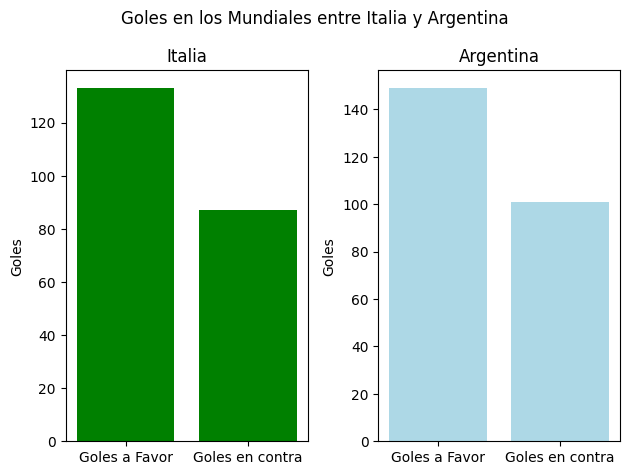

In [252]:
fig, axs = plt.subplots(1, len(paises_elegidos))


for i, pais in enumerate(paises_elegidos):
    ax = axs[i]
    ax.bar(['Goles a Favor', 'Goles en contra'], [top_paises.goles_a_favor[lista_paises.index(pais)], top_paises.goles_en_contra[lista_paises.index(pais)]],color=colores[i])
    ax.set_title(pais)
    ax.set_ylabel('Goles')


plt.suptitle('Goles en los Mundiales entre Italia y Argentina')
plt.tight_layout()
plt.show()
fig.savefig("Goles_Mundiales_Italia_Argentina.png")#Guardar gráfico